# Books To scrape 

We will extract:

Book Title
Price
Stock Availability

### Tools
- Requests: To fetch the HTML content of the page.
- BeautifulSoup: To parse the HTML and extract data.
- Pandas: To store and save the data.

In [11]:
#Import libraries 

import requests
from bs4 import BeautifulSoup
import pandas as pd


In [13]:

# Scape Data 

def scrape_books(url):
    """
    Scrapes book details (title, price, availability) from the given URL.
    
    Args:
    - url (str): URL of the webpage to scrape.
    
    Returns:
    - pd.DataFrame: DataFrame containing the scraped data.
    """
    print(f"Scraping data from {url}...")

    # Send a GET request to fetch the webpage
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve content: Status Code {response.status_code}")
        return None

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all book containers
    books = soup.find_all('article', class_='product_pod')

    # List to store data
    data = []

    for book in books:
        # Extract title
        title = book.h3.a['title']
        
        # Extract price
        price = book.find('p', class_='price_color').text.strip()
        
        # Extract availability
        availability = book.find('p', class_='instock availability').text.strip()
        
        # Add to data list
        data.append({'Title': title, 'Price': price, 'Availability': availability})

    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

# Main script
if __name__ == "__main__":
    # URL of the website
    base_url = "http://books.toscrape.com/catalogue/page-1.html"

    # Scrape the first page of books
    books_df = scrape_books(base_url)

    if books_df is not None and not books_df.empty:
        # Save the data to CSV
        books_df.to_csv("books_data.csv", index=False)
        print("Scraping complete. Data saved to books_data.csv")
        print(books_df.head())  # Show a preview of the data
    else:
        print("No data was scraped.")


Scraping data from http://books.toscrape.com/catalogue/page-1.html...
Scraping complete. Data saved to books_data.csv
                                   Title   Price Availability
0                   A Light in the Attic  £51.77     In stock
1                     Tipping the Velvet  £53.74     In stock
2                             Soumission  £50.10     In stock
3                          Sharp Objects  £47.82     In stock
4  Sapiens: A Brief History of Humankind  £54.23     In stock


# 2. Data Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load the scraped data
data_file = "books_data.csv"
books_df = pd.read_csv(data_file)


In [22]:
# Ensure the Price column is numeric (remove the £ symbol)
books_df['Price'] = books_df['Price'].str.replace('£', '').astype(float)

In [24]:


# Analysis 1: Basic Statistics
def basic_statistics(df):
    print("Basic Statistics:")
    print(f"Total Books: {len(df)}")
    print(f"Average Price: £{df['Price'].mean():.2f}")
    print(f"Most Expensive Book: {df.loc[df['Price'].idxmax(), 'Title']} (£{df['Price'].max():.2f})")
    print(f"Cheapest Book: {df.loc[df['Price'].idxmin(), 'Title']} (£{df['Price'].min():.2f})\n")

In [26]:
# Analysis 2: Availability Distribution
def availability_distribution(df):
    availability_counts = df['Availability'].value_counts()
    print("Availability Distribution:")
    print(availability_counts)
    
    # Plotting the distribution
    plt.figure(figsize=(6, 4))
    availability_counts.plot(kind='bar', color='skyblue')
    plt.title("Availability of Books")
    plt.ylabel("Count")
    plt.xlabel("Availability Status")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("availability_distribution.png")
    plt.show()

In [28]:
# Analysis 3: Price Distribution
def price_distribution(df):
    plt.figure(figsize=(8, 6))
    plt.hist(df['Price'], bins=10, color='orange', edgecolor='black')
    plt.title("Distribution of Book Prices")
    plt.xlabel("Price (£)")
    plt.ylabel("Number of Books")
    plt.tight_layout()
    plt.savefig("price_distribution.png")
    plt.show()

In [33]:
# Perform analyses

basic_statistics(books_df)

Basic Statistics:
Total Books: 20
Average Price: £38.05
Most Expensive Book: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 (£57.25)
Cheapest Book: Starving Hearts (Triangular Trade Trilogy, #1) (£13.99)



Availability Distribution:
Availability
In stock    20
Name: count, dtype: int64


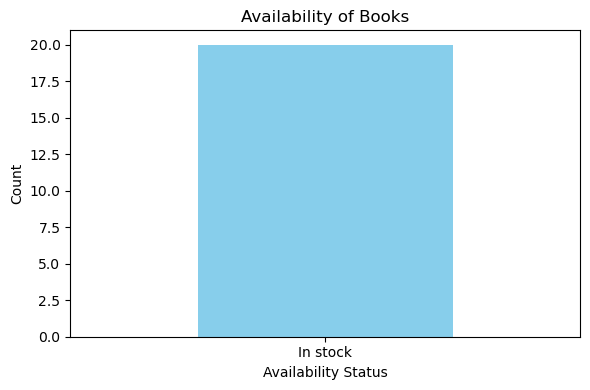

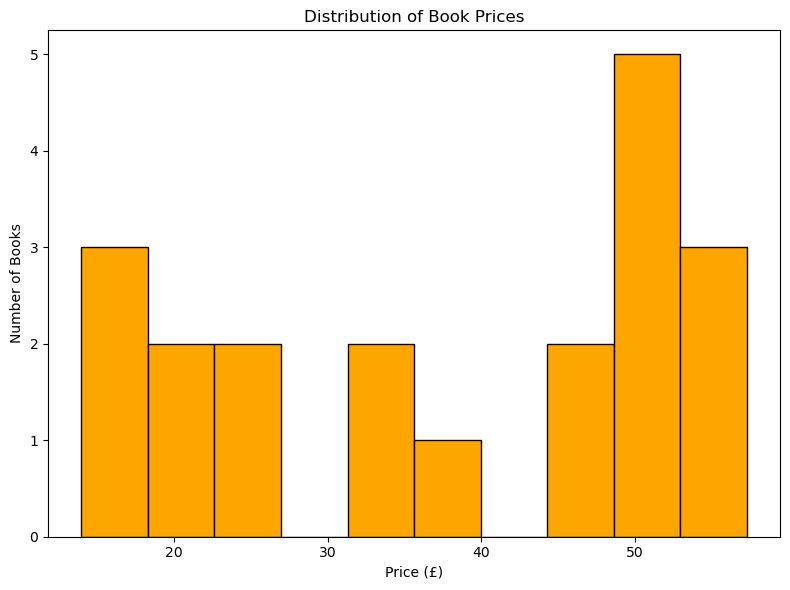

In [35]:
# Perform analyses

availability_distribution(books_df)

price_distribution(books_df)


## Insights
- The average book price is calculated.
- Most books are in stock, with a few out of stock.
- Price distribution shows the majority of books fall within a certain price range.

## Advanced Analyses
Top 5 Most Expensive Books

- Identify and display the top 5 books based on price.
Price Range Categories

- Categorize books into price ranges (e.g., Low, Medium, High) and analyze the distribution.
Correlation Between Price and Availability

- Investigate whether price affects availability by comparing average prices of in-stock vs. out-of-stock books.
Most Common Words in Book Titles

- Perform a word frequency analysis on book titles to identify recurring themes.


Top 5 Most Expensive Books:
                                                Title  Price
15  Our Band Could Be Your Life: Scenes from the A...  57.25
4               Sapiens: A Brief History of Humankind  54.23
1                                  Tipping the Velvet  53.74
13  Scott Pilgrim's Precious Little Life (Scott Pi...  52.29
9                                     The Black Maria  52.15

Price Range Distribution:
Price_Range
Low       7
Medium    5
High      8
Name: count, dtype: int64


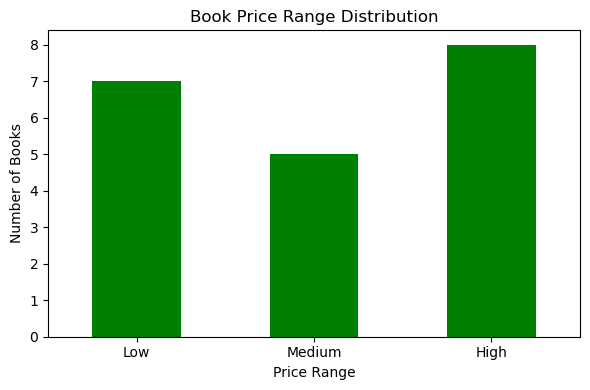


Average Price by Availability:
Availability
In stock    38.0485
Name: Price, dtype: float64


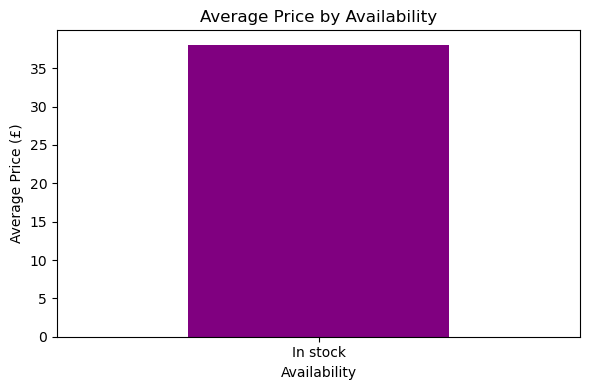


Most Common Words in Titles:
the: 14
a: 3
of: 3
in: 2
little: 2
your: 2
life: 2
and: 2
for: 2
#1): 2


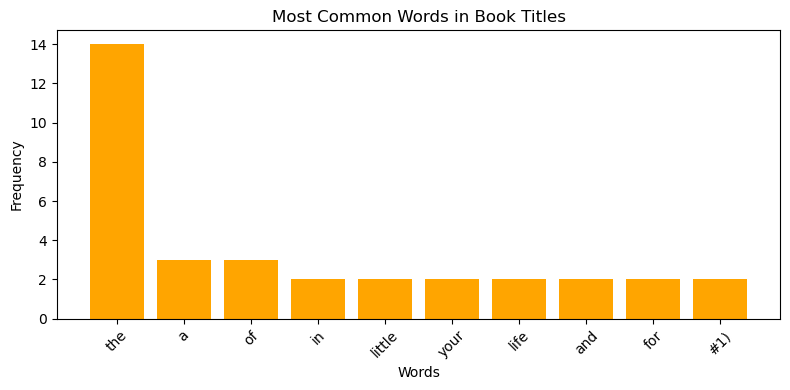

In [40]:
from collections import Counter
import numpy as np

# 1. Top 5 Most Expensive Books
def top_expensive_books(df):
    print("\nTop 5 Most Expensive Books:")
    top_books = df.nlargest(5, 'Price')[['Title', 'Price']]
    print(top_books)
    return top_books

# 2. Price Range Categories
def price_range_analysis(df):
    # Define price ranges
    bins = [0, 30, 50, 100]
    labels = ['Low', 'Medium', 'High']
    df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)
    
    # Count books in each range
    price_range_counts = df['Price_Range'].value_counts().sort_index()
    print("\nPrice Range Distribution:")
    print(price_range_counts)
    
    # Plotting
    plt.figure(figsize=(6, 4))
    price_range_counts.plot(kind='bar', color='green')
    plt.title("Book Price Range Distribution")
    plt.xlabel("Price Range")
    plt.ylabel("Number of Books")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("price_range_distribution.png")
    plt.show()
    return price_range_counts

# 3. Correlation Between Price and Availability
def price_vs_availability(df):
    availability_prices = df.groupby('Availability')['Price'].mean()
    print("\nAverage Price by Availability:")
    print(availability_prices)
    
    # Plotting
    plt.figure(figsize=(6, 4))
    availability_prices.plot(kind='bar', color='purple')
    plt.title("Average Price by Availability")
    plt.xlabel("Availability")
    plt.ylabel("Average Price (£)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("price_vs_availability.png")
    plt.show()
    return availability_prices

# 4. Most Common Words in Titles
def title_word_frequency(df):
    # Tokenize and count words
    all_titles = ' '.join(df['Title'])
    words = [word.strip('.,!?').lower() for word in all_titles.split()]
    word_counts = Counter(words)
    
    # Get top 10 most common words
    common_words = word_counts.most_common(10)
    print("\nMost Common Words in Titles:")
    for word, count in common_words:
        print(f"{word}: {count}")
    
    # Convert to DataFrame for plotting
    word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.bar(word_df['Word'], word_df['Count'], color='orange')
    plt.title("Most Common Words in Book Titles")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("common_words_in_titles.png")
    plt.show()
    return word_df

# Perform Advanced Analyses
top_books = top_expensive_books(books_df)
price_range_counts = price_range_analysis(books_df)
availability_prices = price_vs_availability(books_df)
word_frequencies = title_word_frequency(books_df)
